# Analysis of New York Times best sellers

### Content:

1. Introduction
2. Data Descpription and Objectives
3. Research Questions
4. Data Preparation
5. Data Analysis
6. Conclusion

## 1. Introduction:

The New York Times Best Seller list is widely considered the preeminent list of best-selling books in the United States. It has been published weekly in The New York Times Book Review since October 12, 1931. In the 21st century, it has evolved into multiple lists, grouped by genre and format, including fiction and non-fiction, hardcover, paperback and electronic.

Rankings reflect unit sales reported on a confidential basis by vendors offering a wide range of general interest titles published in the United States. Every week, thousands of diverse selling locations report their actual sales on hundreds of thousands of individual titles. The panel of reporting retailers is comprehensive and reflects sales in tens of thousands of stores of all sizes and demographics across the United States.

The book selling universe is comprised of well-established vendors as well as emerging ones. The sales venues for print books include national, regional and local chains representing tens of thousands of storefronts; many hundreds of independent book retailers; scores of online and multimedia entertainment retailers; supermarkets, university, gift and big-box department stores; and newsstands.

By the 1950s, the list was on its way to being the marketing behemoth it is today, curating a list of the country’s most popular books.

Source(https://www.nytimes.com/books/best-sellers/methodology/)

## 2. Data Description and Objectives:

The New York Times best sellers are divided into different categories such as fiction, non-fiction, hardcover, paperback, electronic and so on. However, in this analysis we will consider the list of a hardcover fiction best sellers from June 7, 2008 to July 22, 2018 since this is the information given in dataset. Nevertheless, it provides a huge amount of information I am interested to work with.

Collected data consists of several points: 

- **Book Title** - the distinguishing name of a book
- **Author** - the composer of a literary work
- **Date of the best seller list** - a particular day, month and year at which the best sellers list was created
- **Published date of the list** - a particular day, month, and year at which the list was published
- **Book description** - a statement that describes a certain book
- **Rank (this week and last week)** - position in the list
- **Publisher** - a person or company whose business is the publishing of books, periodicals and so on
- **Number of weeks on the list** - the length of time a book was in the list
- **Price** - the amount of money for which book is bought

## 3. Research Questions:

**1.** How much does rank influence the time this book is on list?

**2.** Is there a correlation between the date (season) the book was released and weeks it will be on list?

**3.** Determine most popular publishers.

**4.** What are the most frequent words used in description for books?

**5.** Determine if there is a connection between price and rank.

## 4. Data Preparation:

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load and observe data
df = pd.read_json("nyt.json", lines=True)

In [3]:
df.head()

,_id,bestsellers_date,published_date,amazon_product_url,author,description,price,publisher,title,rank,rank_last_week,weeks_on_list
0,{'$oid': '5b4aa4ead3089013507db18b'},{'$date': {'$numberLong': '1211587200000'}},{'$date': {'$numberLong': '1212883200000'}},http://www.amazon.com/Odd-Hours-Dean-Koontz/dp...,Dean R Koontz,"Odd Thomas, who can communicate with the dead,...",{'$numberInt': '27'},Bantam,ODD HOURS,{'$numberInt': '1'},{'$numberInt': '0'},{'$numberInt': '1'}
1,{'$oid': '5b4aa4ead3089013507db18c'},{'$date': {'$numberLong': '1211587200000'}},{'$date': {'$numberLong': '1212883200000'}},http://www.amazon.com/The-Host-Novel-Stephenie...,Stephenie Meyer,Aliens have taken control of the minds and bod...,{'$numberDouble': '25.99'},"Little, Brown",THE HOST,{'$numberInt': '2'},{'$numberInt': '1'},{'$numberInt': '3'}
2,{'$oid': '5b4aa4ead3089013507db18d'},{'$date': {'$numberLong': '1211587200000'}},{'$date': {'$numberLong': '1212883200000'}},http://www.amazon.com/Love-Youre-With-Emily-Gi...,Emily Giffin,A woman's happy marriage is shaken when she en...,{'$numberDouble': '24.95'},St. Martin's,LOVE THE ONE YOU'RE WITH,{'$numberInt': '3'},{'$numberInt': '2'},{'$numberInt': '2'}
3,{'$oid': '5b4aa4ead3089013507db18e'},{'$date': {'$numberLong': '1211587200000'}},{'$date': {'$numberLong': '1212883200000'}},http://www.amazon.com/The-Front-Garano-Patrici...,Patricia Cornwell,A Massachusetts state investigator and his tea...,{'$numberDouble': '22.95'},Putnam,THE FRONT,{'$numberInt': '4'},{'$numberInt': '0'},{'$numberInt': '1'}
4,{'$oid': '5b4aa4ead3089013507db18f'},{'$date': {'$numberLong': '1211587200000'}},{'$date': {'$numberLong': '1212883200000'}},http://www.amazon.com/Snuff-Chuck-Palahniuk/dp...,Chuck Palahniuk,An aging porn queens aims to cap her career by...,{'$numberDouble': '24.95'},Doubleday,SNUFF,{'$numberInt': '5'},{'$numberInt': '0'},{'$numberInt': '1'}


Clearly, pandas haven't converted all of the data to needed format, lets convert the data to needed format.

In [4]:
#Lets start from bestsellers_date and published_date, the date is given as a dict that leading to the unix timestamp format.
import json
from datetime import datetime
bestsellers_date = list() #create a list for unix timestamp strings 

for i in df['bestsellers_date'] :
    temp = datetime.utcfromtimestamp(int(i['$date']['$numberLong'])/1000).strftime('%Y-%m-%d')
    bestsellers_date.append(temp)
df['bestsellers_date'] = bestsellers_date

published_date = list()

for i in df['published_date'] : 
    temp = datetime.utcfromtimestamp(int(i['$date']['$numberLong'])/1000).strftime('%Y-%m-%d')
    published_date.append(temp)
df['published_date'] = published_date
df[:]

,_id,bestsellers_date,published_date,amazon_product_url,author,description,price,publisher,title,rank,rank_last_week,weeks_on_list
0,{'$oid': '5b4aa4ead3089013507db18b'},2008-05-24,2008-06-08,http://www.amazon.com/Odd-Hours-Dean-Koontz/dp...,Dean R Koontz,"Odd Thomas, who can communicate with the dead,...",{'$numberInt': '27'},Bantam,ODD HOURS,{'$numberInt': '1'},{'$numberInt': '0'},{'$numberInt': '1'}
1,{'$oid': '5b4aa4ead3089013507db18c'},2008-05-24,2008-06-08,http://www.amazon.com/The-Host-Novel-Stephenie...,Stephenie Meyer,Aliens have taken control of the minds and bod...,{'$numberDouble': '25.99'},"Little, Brown",THE HOST,{'$numberInt': '2'},{'$numberInt': '1'},{'$numberInt': '3'}
2,{'$oid': '5b4aa4ead3089013507db18d'},2008-05-24,2008-06-08,http://www.amazon.com/Love-Youre-With-Emily-Gi...,Emily Giffin,A woman's happy marriage is shaken when she en...,{'$numberDouble': '24.95'},St. Martin's,LOVE THE ONE YOU'RE WITH,{'$numberInt': '3'},{'$numberInt': '2'},{'$numberInt': '2'}
3,{'$oid': '5b4aa4ead3089013507db18e'},2008-05-24,2008-06-08,http://www.amazon.com/The-Front-Garano-Patrici...,Patricia Cornwell,A Massachusetts state investigator and his tea...,{'$numberDouble': '22.95'},Putnam,THE FRONT,{'$numberInt': '4'},{'$numberInt': '0'},{'$numberInt': '1'}
4,{'$oid': '5b4aa4ead3089013507db18f'},2008-05-24,2008-06-08,http://www.amazon.com/Snuff-Chuck-Palahniuk/dp...,Chuck Palahniuk,An aging porn queens aims to cap her career by...,{'$numberDouble': '24.95'},Doubleday,SNUFF,{'$numberInt': '5'},{'$numberInt': '0'},{'$numberInt': '1'}
...,...,...,...,...,...,...,...,...,...,...,...,...
10190,{'$oid': '5b4aa4ead3089013507dd959'},2018-07-07,2018-07-22,https://www.amazon.com/Clancy-Line-Sight-Jack-...,Mike Maden,Jack Ryan Jr. risks his life to protect a woma...,{'$numberInt': '0'},Putnam,TOM CLANCY LINE OF SIGHT,{'$numberInt': '11'},{'$numberInt': '6'},{'$numberInt': '4'}
10191,{'$oid': '5b4aa4ead3089013507dd95a'},2018-07-07,2018-07-22,https://www.amazon.com/Something-Water-Novel-C...,Catherine Steadman,A documentary filmmaker and an investment bank...,{'$numberInt': '0'},Ballantine,SOMETHING IN THE WATER,{'$numberInt': '12'},{'$numberInt': '11'},{'$numberInt': '5'}
10192,{'$oid': '5b4aa4ead3089013507dd95b'},2018-07-07,2018-07-22,https://www.amazon.com/Little-Fires-Everywhere...,Celeste Ng,An artist upends a quiet town outside Cleveland.,{'$numberInt': '0'},Penguin Press,LITTLE FIRES EVERYWHERE,{'$numberInt': '13'},{'$numberInt': '12'},{'$numberInt': '41'}
10193,{'$oid': '5b4aa4ead3089013507dd95c'},2018-07-07,2018-07-22,https://www.amazon.com/Shelter-Place-Nora-Robe...,Nora Roberts,Survivors of a mass shooting outside a mall in...,{'$numberInt': '0'},St. Martin's,SHELTER IN PLACE,{'$numberInt': '14'},{'$numberInt': '5'},{'$numberInt': '6'}


In [5]:
#next we need to convert all of the numbers from dict to needed format
price = list()
rank = list()
rank_last_week = list()
weeks_on_list = list()

for i in df['price'] : 
    price.append(list(i.values())[0])
df['price'] = price


for i in df['rank'] : 
    rank.append(list(i.values())[0])
df['rank'] = rank

for i in df['rank_last_week'] : 
    rank_last_week.append(list(i.values())[0])
df['rank_last_week'] = rank_last_week

for i in df['weeks_on_list'] : 
    weeks_on_list.append(list(i.values())[0])
df['weeks_on_list'] = weeks_on_list
df[:]


,_id,bestsellers_date,published_date,amazon_product_url,author,description,price,publisher,title,rank,rank_last_week,weeks_on_list
0,{'$oid': '5b4aa4ead3089013507db18b'},2008-05-24,2008-06-08,http://www.amazon.com/Odd-Hours-Dean-Koontz/dp...,Dean R Koontz,"Odd Thomas, who can communicate with the dead,...",27,Bantam,ODD HOURS,1,0,1
1,{'$oid': '5b4aa4ead3089013507db18c'},2008-05-24,2008-06-08,http://www.amazon.com/The-Host-Novel-Stephenie...,Stephenie Meyer,Aliens have taken control of the minds and bod...,25.99,"Little, Brown",THE HOST,2,1,3
2,{'$oid': '5b4aa4ead3089013507db18d'},2008-05-24,2008-06-08,http://www.amazon.com/Love-Youre-With-Emily-Gi...,Emily Giffin,A woman's happy marriage is shaken when she en...,24.95,St. Martin's,LOVE THE ONE YOU'RE WITH,3,2,2
3,{'$oid': '5b4aa4ead3089013507db18e'},2008-05-24,2008-06-08,http://www.amazon.com/The-Front-Garano-Patrici...,Patricia Cornwell,A Massachusetts state investigator and his tea...,22.95,Putnam,THE FRONT,4,0,1
4,{'$oid': '5b4aa4ead3089013507db18f'},2008-05-24,2008-06-08,http://www.amazon.com/Snuff-Chuck-Palahniuk/dp...,Chuck Palahniuk,An aging porn queens aims to cap her career by...,24.95,Doubleday,SNUFF,5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10190,{'$oid': '5b4aa4ead3089013507dd959'},2018-07-07,2018-07-22,https://www.amazon.com/Clancy-Line-Sight-Jack-...,Mike Maden,Jack Ryan Jr. risks his life to protect a woma...,0,Putnam,TOM CLANCY LINE OF SIGHT,11,6,4
10191,{'$oid': '5b4aa4ead3089013507dd95a'},2018-07-07,2018-07-22,https://www.amazon.com/Something-Water-Novel-C...,Catherine Steadman,A documentary filmmaker and an investment bank...,0,Ballantine,SOMETHING IN THE WATER,12,11,5
10192,{'$oid': '5b4aa4ead3089013507dd95b'},2018-07-07,2018-07-22,https://www.amazon.com/Little-Fires-Everywhere...,Celeste Ng,An artist upends a quiet town outside Cleveland.,0,Penguin Press,LITTLE FIRES EVERYWHERE,13,12,41
10193,{'$oid': '5b4aa4ead3089013507dd95c'},2018-07-07,2018-07-22,https://www.amazon.com/Shelter-Place-Nora-Robe...,Nora Roberts,Survivors of a mass shooting outside a mall in...,0,St. Martin's,SHELTER IN PLACE,14,5,6


In [6]:
#we don't need column '_id' because it is given in mongodb format, so lets just drop that column
#besides that, we will not use url column, so we will also drop it
df = df.drop(columns = ['_id', 'amazon_product_url'])
df[:]

,bestsellers_date,published_date,author,description,price,publisher,title,rank,rank_last_week,weeks_on_list
0,2008-05-24,2008-06-08,Dean R Koontz,"Odd Thomas, who can communicate with the dead,...",27,Bantam,ODD HOURS,1,0,1
1,2008-05-24,2008-06-08,Stephenie Meyer,Aliens have taken control of the minds and bod...,25.99,"Little, Brown",THE HOST,2,1,3
2,2008-05-24,2008-06-08,Emily Giffin,A woman's happy marriage is shaken when she en...,24.95,St. Martin's,LOVE THE ONE YOU'RE WITH,3,2,2
3,2008-05-24,2008-06-08,Patricia Cornwell,A Massachusetts state investigator and his tea...,22.95,Putnam,THE FRONT,4,0,1
4,2008-05-24,2008-06-08,Chuck Palahniuk,An aging porn queens aims to cap her career by...,24.95,Doubleday,SNUFF,5,0,1
...,...,...,...,...,...,...,...,...,...,...
10190,2018-07-07,2018-07-22,Mike Maden,Jack Ryan Jr. risks his life to protect a woma...,0,Putnam,TOM CLANCY LINE OF SIGHT,11,6,4
10191,2018-07-07,2018-07-22,Catherine Steadman,A documentary filmmaker and an investment bank...,0,Ballantine,SOMETHING IN THE WATER,12,11,5
10192,2018-07-07,2018-07-22,Celeste Ng,An artist upends a quiet town outside Cleveland.,0,Penguin Press,LITTLE FIRES EVERYWHERE,13,12,41
10193,2018-07-07,2018-07-22,Nora Roberts,Survivors of a mass shooting outside a mall in...,0,St. Martin's,SHELTER IN PLACE,14,5,6


In [7]:
#lets convert some of the types to needed ones.
df = df.astype({"price": "double", "rank": "int", "rank_last_week": "int", "weeks_on_list": "int"})
#we can notice that many of the parametres like price or rank have '0' for some of the values, lets replace them by NaN
df.replace(0, np.nan, inplace = True)
df[:]

,bestsellers_date,published_date,author,description,price,publisher,title,rank,rank_last_week,weeks_on_list
0,2008-05-24,2008-06-08,Dean R Koontz,"Odd Thomas, who can communicate with the dead,...",27.00,Bantam,ODD HOURS,1,NaN,1.0
1,2008-05-24,2008-06-08,Stephenie Meyer,Aliens have taken control of the minds and bod...,25.99,"Little, Brown",THE HOST,2,1.0,3.0
2,2008-05-24,2008-06-08,Emily Giffin,A woman's happy marriage is shaken when she en...,24.95,St. Martin's,LOVE THE ONE YOU'RE WITH,3,2.0,2.0
3,2008-05-24,2008-06-08,Patricia Cornwell,A Massachusetts state investigator and his tea...,22.95,Putnam,THE FRONT,4,NaN,1.0
4,2008-05-24,2008-06-08,Chuck Palahniuk,An aging porn queens aims to cap her career by...,24.95,Doubleday,SNUFF,5,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...
10190,2018-07-07,2018-07-22,Mike Maden,Jack Ryan Jr. risks his life to protect a woma...,NaN,Putnam,TOM CLANCY LINE OF SIGHT,11,6.0,4.0
10191,2018-07-07,2018-07-22,Catherine Steadman,A documentary filmmaker and an investment bank...,NaN,Ballantine,SOMETHING IN THE WATER,12,11.0,5.0
10192,2018-07-07,2018-07-22,Celeste Ng,An artist upends a quiet town outside Cleveland.,NaN,Penguin Press,LITTLE FIRES EVERYWHERE,13,12.0,41.0
10193,2018-07-07,2018-07-22,Nora Roberts,Survivors of a mass shooting outside a mall in...,NaN,St. Martin's,SHELTER IN PLACE,14,5.0,6.0


In [8]:
#now lets see how much of data is missing 
data_valid = pd.DataFrame() 
data_valid['Columns'] = list(df.columns)
data_valid['Count'] = list(df.count())
data_valid[:]

,Columns,Count
0,bestsellers_date,10195
1,published_date,10195
2,author,10195
3,description,10195
4,price,4011
5,publisher,10195
6,title,10195
7,rank,10195
8,rank_last_week,6021
9,weeks_on_list,8230


## 5. Data Analysis:

### Q1: How much does rank influence the time this book is on list?

In [9]:
#for this part we will use only data where both rank and weeks_on_list are given
rank_weeks = pd.DataFrame()
rank_weeks['rank'] = df['rank']
rank_weeks['weeks_on_list'] = df['weeks_on_list']
rank_weeks = rank_weeks.dropna()
rank_weeks[:]

,rank,weeks_on_list
0,1,1.0
1,2,3.0
2,3,2.0
3,4,1.0
4,5,1.0
...,...,...
10190,11,4.0
10191,12,5.0
10192,13,41.0
10193,14,6.0


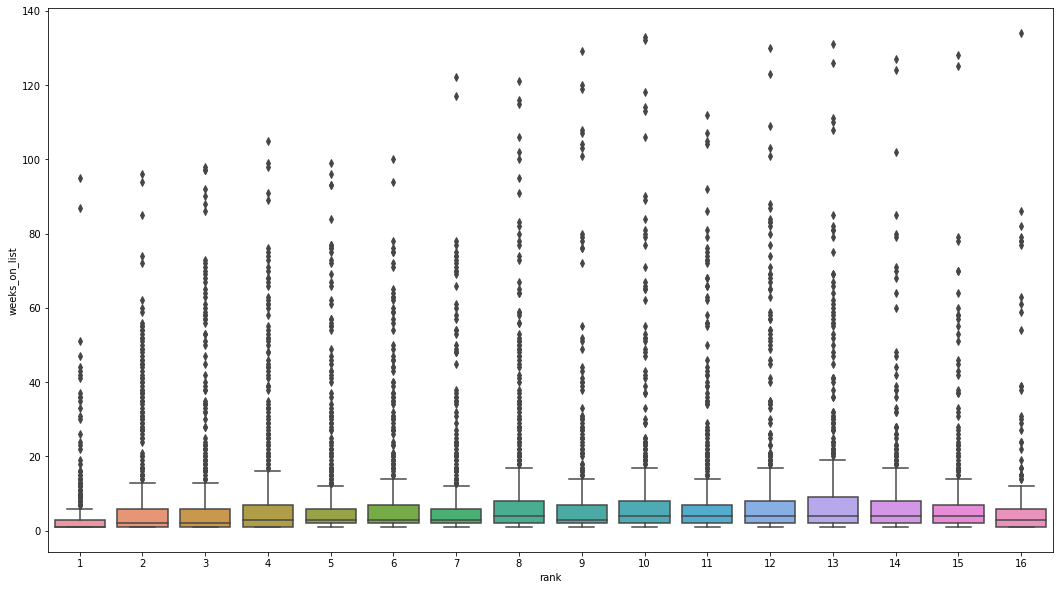

In [10]:
#ranks go through 1 to 15, so lets use that
fig_dims = (18,10) 
fig, ax = plt.subplots(figsize=fig_dims) 
fig = sns.boxplot(x="rank", y="weeks_on_list", data = rank_weeks, ax=ax)

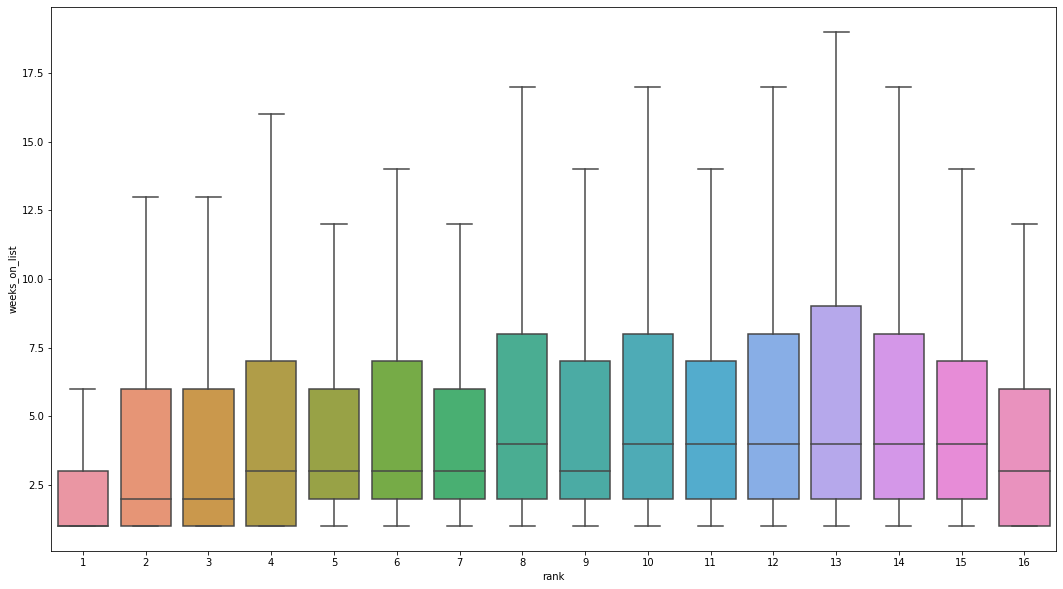

In [11]:
#without outliers: 
fig_dims = (18,10) 
fig, ax = plt.subplots(figsize=fig_dims) 
fig = sns.boxplot(x="rank", y="weeks_on_list", data = rank_weeks, ax=ax, showfliers = False)

### Q2: Is there a correlation between the date (season) the book was released and weeks it will be on list?

In [12]:
season = list()
for i in df['published_date'] : 
    if int(i[5:7]) == 12 or int(i[5:7]) == 1 or int(i[5:7]) == 2 : 
        season.append('Winter')
    if int(i[5:7]) == 3 or int(i[5:7]) == 4 or int(i[5:7]) == 5 :
        season.append('Spring')
    if int(i[5:7]) == 6 or int(i[5:7]) == 7 or int(i[5:7]) == 8 :
        season.append('Summer')
    if int(i[5:7]) == 9 or int(i[5:7]) == 10 or int(i[5:7]) == 11 : 
        season.append('Autumn')
df['season'] = season
df[:]

,bestsellers_date,published_date,author,description,price,publisher,title,rank,rank_last_week,weeks_on_list,season
0,2008-05-24,2008-06-08,Dean R Koontz,"Odd Thomas, who can communicate with the dead,...",27.00,Bantam,ODD HOURS,1,NaN,1.0,Summer
1,2008-05-24,2008-06-08,Stephenie Meyer,Aliens have taken control of the minds and bod...,25.99,"Little, Brown",THE HOST,2,1.0,3.0,Summer
2,2008-05-24,2008-06-08,Emily Giffin,A woman's happy marriage is shaken when she en...,24.95,St. Martin's,LOVE THE ONE YOU'RE WITH,3,2.0,2.0,Summer
3,2008-05-24,2008-06-08,Patricia Cornwell,A Massachusetts state investigator and his tea...,22.95,Putnam,THE FRONT,4,NaN,1.0,Summer
4,2008-05-24,2008-06-08,Chuck Palahniuk,An aging porn queens aims to cap her career by...,24.95,Doubleday,SNUFF,5,NaN,1.0,Summer
...,...,...,...,...,...,...,...,...,...,...,...
10190,2018-07-07,2018-07-22,Mike Maden,Jack Ryan Jr. risks his life to protect a woma...,NaN,Putnam,TOM CLANCY LINE OF SIGHT,11,6.0,4.0,Summer
10191,2018-07-07,2018-07-22,Catherine Steadman,A documentary filmmaker and an investment bank...,NaN,Ballantine,SOMETHING IN THE WATER,12,11.0,5.0,Summer
10192,2018-07-07,2018-07-22,Celeste Ng,An artist upends a quiet town outside Cleveland.,NaN,Penguin Press,LITTLE FIRES EVERYWHERE,13,12.0,41.0,Summer
10193,2018-07-07,2018-07-22,Nora Roberts,Survivors of a mass shooting outside a mall in...,NaN,St. Martin's,SHELTER IN PLACE,14,5.0,6.0,Summer


In [13]:
#first we need count of books during the season
q2_1 = df[['season', 'description']].groupby(['season']).count()
q2_1 = q2_1.rename(columns = {'description' : 'count'})
q2_1[:]

,count
season,
Autumn,2535
Spring,2510
Summer,2675
Winter,2475


In [14]:
#now we get the sum of weeks 
q2_2 = df[['season', 'weeks_on_list']].groupby(['season']).sum()
q2_2[:]

,weeks_on_list
season,
Autumn,15637.0
Spring,17824.0
Summer,17650.0
Winter,19609.0


In [15]:
#merge two df's and get the average weeks on list
q2_1.reset_index(inplace = True)
q2_2.reset_index(inplace = True)
q2 = pd.merge(q2_1, q2_2, on = 'season')
q2['avg_weeks'] = q2['weeks_on_list'].div(q2['count']).round(3)
q2[:]

,season,count,weeks_on_list,avg_weeks
0,Autumn,2535,15637.0,6.168
1,Spring,2510,17824.0,7.101
2,Summer,2675,17650.0,6.598
3,Winter,2475,19609.0,7.923


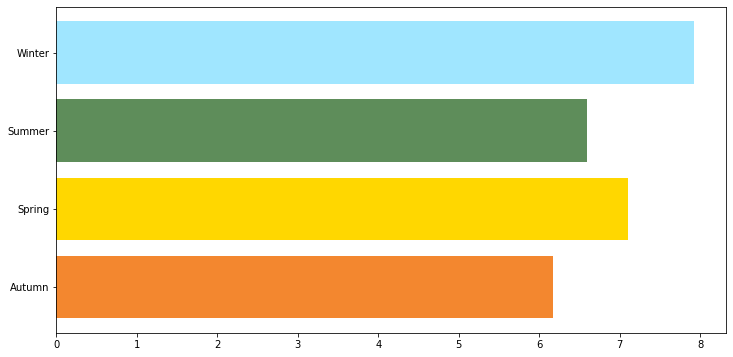

In [16]:
plt.figure(figsize=(12,6))
plt.barh(q2['season'], q2['avg_weeks'], color = ['#f3872f', '#ffd700', '#5e8d5a', '#a0e6ff'])
plt.show()

### Q3: Determine most popular publishers.

In [17]:
q3 = df[['publisher', 'title']].groupby(['publisher']).count()
q3 = q3.rename(columns = {'title':'count'})
q3.reset_index(inplace = True)
q3[:]

,publisher,count
0,ACE,5
1,Ace,125
2,Algonquin,15
3,Amistad/HarperCollins,2
4,Amy Einhorn,1
...,...,...
171,W. W. Norton,1
172,William Morrow,21
173,William Morrow/HarperCollins,9
174,Wizards of the Coast,21


In [18]:
#now lets sort by count
q3 = q3.sort_values(by = ['count'], ascending = False)
q3[:]

,publisher,count
128,Putnam,1061
93,"Little, Brown",943
60,Grand Central,619
88,Knopf,559
37,Doubleday,475
...,...,...
122,Penguin Group,1
70,Harper Voyager/HarperCollins Publishers,1
155,Thomas Nelson,1
26,Daw,1


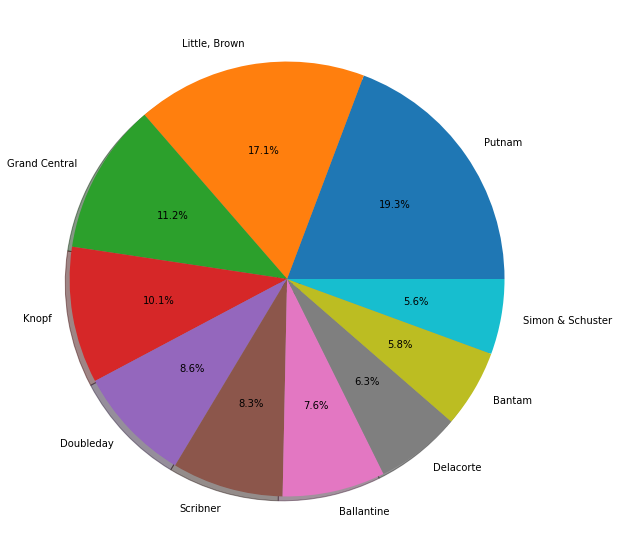

In [19]:
#we will take top 10 to represent them on our pie chart
plt.figure(figsize=(10,10))
plt.pie(q3['count'][:10],  labels=q3['publisher'][:10], autopct='%1.1f%%',
        shadow=True)
plt.show()

### Q4: What are the most frequent words used in description for books?

In [20]:
 from collections import Counter
Counter(" ".join(df["description"]).split()).most_common(50)

[('a', 9239),
 ('the', 8548),
 ('of', 6183),
 ('in', 4398),
 ('and', 4367),
 ('to', 3379),
 ('A', 3197),
 ('The', 1928),
 ('her', 1766),
 ('is', 1645),
 ('who', 1427),
 ('his', 1390),
 ('an', 1268),
 ('with', 1202),
 ('on', 1135),
 ('for', 1096),
 ('from', 977),
 ('by', 928),
 ('woman', 837),
 ('In', 726),
 ('that', 591),
 ('as', 546),
 ('about', 504),
 ('when', 488),
 ('has', 464),
 ('New', 452),
 ('must', 449),
 ('at', 447),
 ('she', 442),
 ('young', 433),
 ('their', 421),
 ('An', 410),
 ('War', 401),
 ('family', 398),
 ('detective', 394),
 ('two', 385),
 ('are', 379),
 ('life', 378),
 ('new', 372),
 ('World', 368),
 ('former', 362),
 ('investigates', 360),
 ('murder', 348),
 ('man', 348),
 ('one', 345),
 ('after', 328),
 ('up', 311),
 ('lives', 308),
 ('into', 303),
 ('years', 303)]

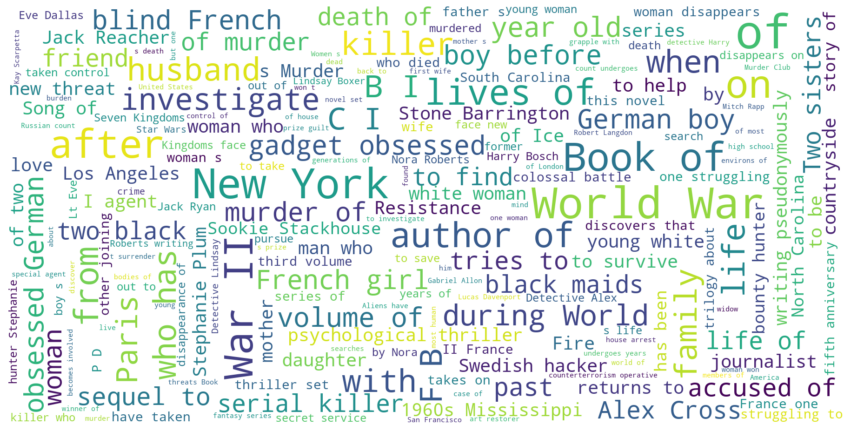

In [21]:
words = list(df["description"].apply(lambda x: x.split()))
words = [x for y in words for x in y]
from wordcloud import WordCloud, STOPWORDS
stopwords = ['a', 'the', '-', 'is', 'at', 'their', 'his', 'her', 'she', 'as', 'A', 'An', 'are', 'up', 'and', 'in', 'for']
wordcloud = WordCloud(width = 1800, height = 900, 
                          stopwords=stopwords, background_color='white',
                          max_font_size=100,).generate(" ".join(words))
plt.figure(figsize = (15,10))
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis("off") 
plt.show()

### Q5: Determine if there is a connection between price and rank.

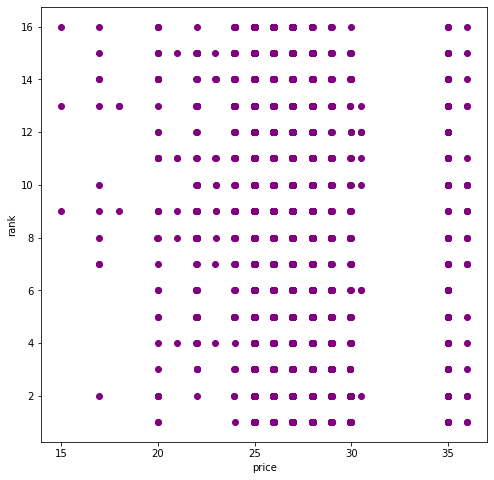

In [22]:
plt.figure(figsize=(8,8))
x = df['price']
y = df['rank']
plt.scatter(x, y, color = 'purple') 
plt.xlabel('price')
plt.ylabel('rank')
plt.show()

## 6. Conclusion:

Based on the analysis and research questions I can sum up that 

1. There is no strict correlation in how does rank influence the time a certain book is on list which is quite surprising since for many people New York Times best sellers list serves as a recommendation for books.
2. The largest number of published books fell on the winter season. Most likely, this can be explained by the fact that in winter people celebrate many holidays and massively start to buy various products.
3. The top 3 most popular publishers included "Putnam", "Little, Brown" and "Grand Central".
4. As you can see in the graph the most frequent words in the descriptions of books were "New York", "World War", "Murder" and so on. Many of these books were about wars, history and investigations.
5. The final graph showed that there is no significant connection between price and rank.
